In [11]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
# 增加一行ans
df["ans"] = iris["target"]
# 輸出成csv
# df.to_csv("iris.csv", encoding="utf-8", index=False)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
...,...,...,...,...,...
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [2]:
# 把資料{隨機}分成兩組 - 一組(90%)訓練 一組考試(10%)
from sklearn.model_selection import train_test_split
# [90%題目, 10%題目, 90%答案, 10%答案]
x_train, x_test, y_train, y_test = train_test_split(iris["data"], 
                                                    iris["target"], 
                                                    test_size=0.1)

In [3]:
# 準備模型
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [4]:
# 訓練(fit)模型: 考古題
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

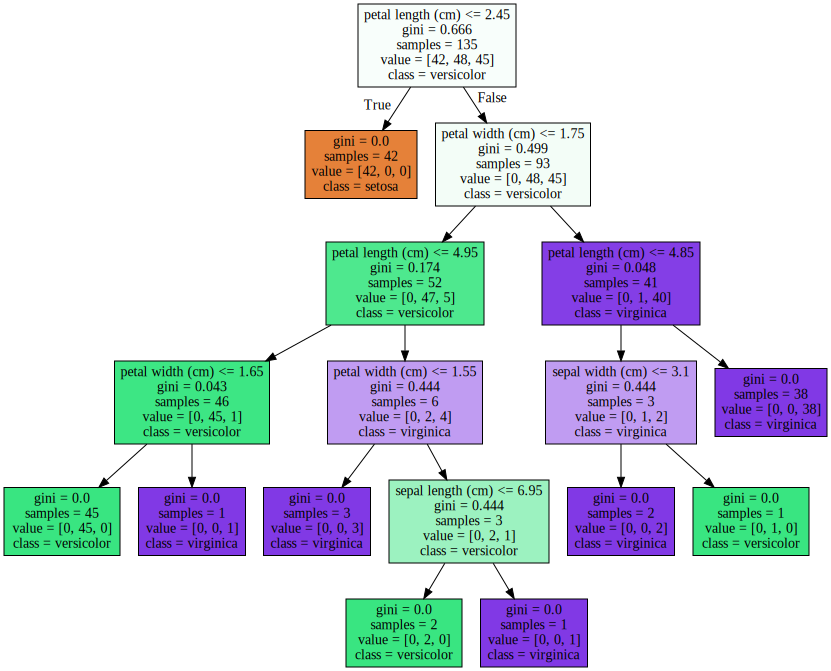

In [5]:
# 秀出公式長啥樣子
import graphviz
from sklearn.tree import export_graphviz
g = export_graphviz(clf, 
                    feature_names=iris["feature_names"], 
                    class_names=iris["target_names"], 
                    filled=True)
graphviz.Source(g)

In [6]:
# 驗證模型: 考試
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
print("預測:", list(pre))
print("正確:", list(y_test))
print("正確率:", accuracy_score(pre, y_test))

預測: [1, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2]
正確: [1, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2]
正確率: 1.0
